In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [ ]:
# 十个点
# 生成一个包含10个元素的等差数列，起始值为0，终止值为1
x = np.linspace(0, 1, 10)
# 生成一个包含1000个元素的等差数列，起始值为0，终止值为1
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
# 生成一个新的列表y，其中每个元素都是y_中对应元素加上一个服从正态分布的随机数
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    # 生成一个长度为M+1的随机数组，每个元素取值范围为[0,1)
    p_init = np.random.rand(M + 1)
    # 打印生成的随机数组
    print(p_init)
    # 最小二乘法
    # 使用最小二乘法拟合数据
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    # 打印拟合结果
    print(p_lsq)
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    # 绘制真实函数曲线
    plt.plot(x_points, real_func(x_points), label='real')
    # 绘制拟合曲线
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    # 绘制带有噪音的点
    plt.plot(x, y, 'bo', label='noise')
    # 添加图例
    plt.legend()
    return p_lsq

In [5]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

[0.21956216]
(array([-0.0051404]), 1)
Fitting Parameters: [-0.0051404]


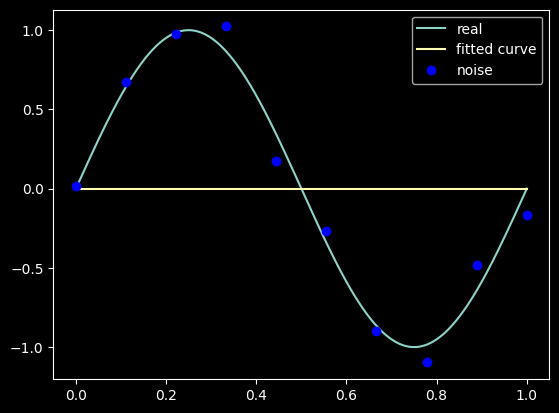

In [7]:
p_lsq_0 = fitting(M=0)

[0.95662237 0.4027207 ]
(array([-1.43411898,  0.71191908]), 1)
Fitting Parameters: [-1.43411898  0.71191908]


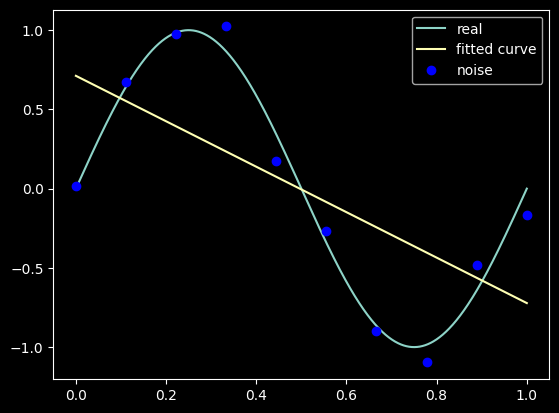

In [8]:
p_lsq_1 = fitting(M=1)

[0.63296622 0.69764274 0.13692797 0.72553506]
(array([ 2.06200528e+01, -3.10514969e+01,  1.04229091e+01, -1.88606774e-02]), 1)
Fitting Parameters: [ 2.06200528e+01 -3.10514969e+01  1.04229091e+01 -1.88606774e-02]


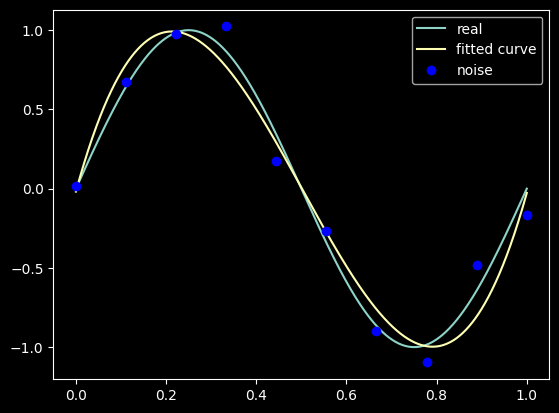

In [9]:
p_lsq_1 = fitting(M=3)

[0.68283567 0.15472149 0.98115178 0.18241066 0.58866675 0.75020166
 0.00601563 0.32673703 0.22545601 0.4359874 ]
(array([ 4.37433969e+04, -2.01562401e+05,  3.90351624e+05, -4.12480248e+05,
        2.58072681e+05, -9.68541543e+04,  2.09917285e+04, -2.37301332e+03,
        1.10199650e+02,  1.77526481e-02]), 2)
Fitting Parameters: [ 4.37433969e+04 -2.01562401e+05  3.90351624e+05 -4.12480248e+05
  2.58072681e+05 -9.68541543e+04  2.09917285e+04 -2.37301332e+03
  1.10199650e+02  1.77526481e-02]


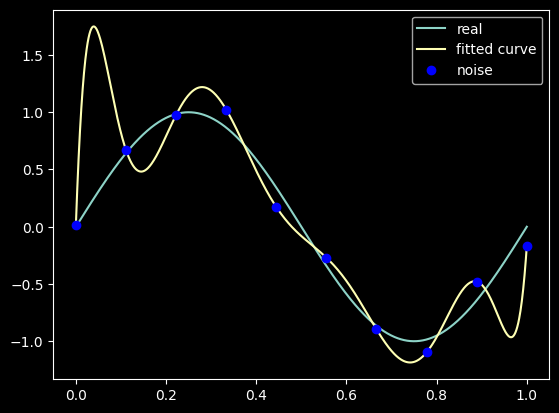

In [15]:
p_lsq_9 = fitting(M=9)

In [16]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [17]:
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

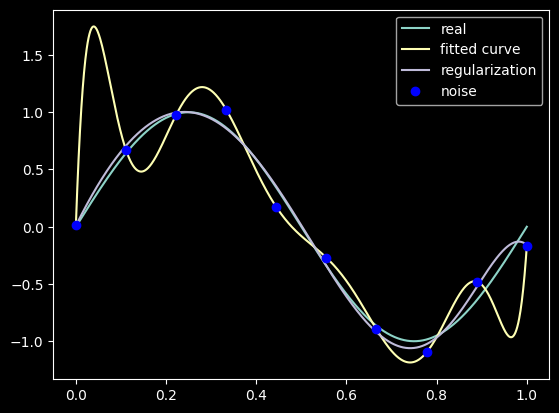

In [18]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)